Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[PosixPath('/content/drive/My Drive/iicex/3x3.png'), PosixPath('/content/drive/My Drive/iicex/autumn.png'), PosixPath('/content/drive/My Drive/iicex/baboon.png'), PosixPath('/content/drive/My Drive/iicex/cat.png'), PosixPath('/content/drive/My Drive/iicex/cow.png'), PosixPath('/content/drive/My Drive/iicex/cowboy.png'), PosixPath('/content/drive/My Drive/iicex/ice-skates.png'), PosixPath('/content/drive/My Drive/iicex/ladybug.png'), PosixPath('/content/drive/My Drive/iicex/lena.png'), PosixPath('/content/drive/My Drive/iicex/raspberries.png'), PosixPath('/content/drive/My Drive/iicex/torre.png'), PosixPath('/content/drive/My Drive/iicex/tree.png'), PosixPath('/content/drive/My Drive/iicex/colab'), PosixPath('/content/drive/My Drive/iicex/sonotaimg')]
img:  (512, 512, 3)
sampleimg:  (512, 512)


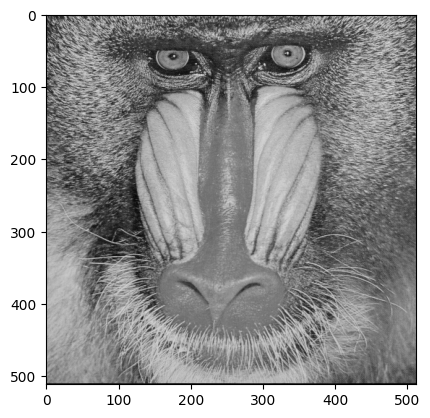

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#print(list( p.iterdir() ))  # フォルダの内容をリストにする


from skimage import io # 入出力ライブラリの読み込み
img = io.imread('/content/drive/My Drive/iicex/baboon.png')  # 画像ファイルの読み込み
print("img: ", img.shape)

#モノクロ化
sampleimg = np.array([[0.2989 * img[i, j, 0] + 0.5870 * img[i, j, 1] + 0.1140 * img[i, j, 2] for j in range(512)] for i in range(512)], dtype='uint8')
print("sampleimg: ", sampleimg.shape)
plt.imshow(sampleimg, cmap='gray', vmin=0, vmax=255)

[[-2  0  2]
 [-4  0  4]
 [-3  0  3]]
[[0 0]
 [0 0]]
[[-145    0   48]
 [-232    0   78]
 [ -76    0   46]]


<function matplotlib.pyplot.show(close=None, block=None)>

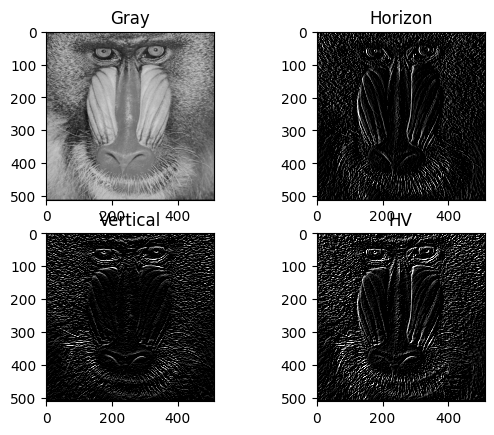

In [ ]:
HSfilter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #Horizontal Sobel Filter
VSfilter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) #Vertical Sobel Filter

print(HSfilter * np.array([[2,2,2], [2,2,2],[3,3,3]])) #「*」は各要素ごとに積をとる


Himg = np.array([[0 for j in range(511)] for i in range (511)])
Vimg = np.array([[0 for j in range(511)] for i in range (511)])


print(Himg[0: 2, 0: 2])
print(HSfilter * sampleimg[0: 3, 0: 3])


for j in range(0,510):
  for i in range(0,510): #端っこは周りに8マスないので、無視する。つまり出力は(n-2)×(n-2)画素になる
                         #上下左右にループしてると考えればn×n画素で出力できるかなとも考えたが、スライスをうまく使えなかった。断念

    ##print(HSfilter * sampleimg[i: i+3, j: j+3])
    #ijを左上において走査している
    Himg[i, j] = np.sum(HSfilter * sampleimg[i: i+3, j: j+3])
    Vimg[i, j] = np.sum(VSfilter * sampleimg[i: i+3, j: j+3])
    #numpyなら配列の各要素の和をとれる。便利！！！！

HVimg = np.array( [ [ Himg[i, j] + Vimg[i, j] for j in range(511)] for i in range (511)])






#plt.imshow(Himg, cmap='gray', vmin=0, vmax=255)

fig = plt.figure()

axes = [[] for k in range(4)]
titles = ["Gray", "Horizon", "Vertical", "HV"]
imgs = [sampleimg, Himg, Vimg, HVimg]



for k in range(4):
  axes[k] =  fig.add_subplot(2, 2, k+1)
  axes[k].set_title(titles[k])
  axes[k].imshow(imgs[k], cmap='gray', vmin=0, vmax=255)
  #「0～1で正規化する必要がある」ってなんだろう？vminとvmaxを決めてるからそれでいいのかな？



plt.show

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8])
print(x[-2:2]) #逆側から帰ってきてはくれない([7,8,0,1]とはならない)
print([i for i in range(5)])
print([i for i in range(1,5)]) #ここの引値は「:」ではない

[]
[0, 1, 2, 3, 4]
[1, 2, 3, 4]
